<h1> Robot Navigation Project </h1>

In [2]:
## referencies:
# http://vision.deis.unibo.it/~smatt/Papers/VI2002/VI2002.pdf

<h3> Libraries and Global Variables </h3>

In [3]:
f = 567.2 # focal length in pixel
b = 92.226 # base line in mm
cb_w = 125 # chessboard total width in  mm
cb_h = 178 # chessboard total height in mm
pattern_size = (6, 8) # number of inner corner, (columns, rows) of chessboard

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h3> Extracting image frames from video </h3>

In [5]:
roboL = cv2.VideoCapture('./robotL.avi')
roboL_frames = []

while roboL.isOpened():
    ret, frame = roboL.read()
    if not ret:
        break
    roboL_frames = roboL_frames + [frame]

In [6]:
roboR = cv2.VideoCapture('./robotR.avi')
roboR_frames = []

while roboR.isOpened():
    ret, frame = roboR.read()
    if not ret:
        break
    roboR_frames = roboR_frames + [frame]

In [7]:
print("No. of frames for left camera : ", len(roboL_frames))
print("No of frames for right camera : ", len(roboR_frames))

No. of frames for left camera :  389
No of frames for right camera :  389


In [8]:
roboL_frames[10].shape

(480, 640, 3)

<h3> Image Processing & Histogram Analysis on single image </h3>

In [9]:
img = roboL_frames[100]

In [10]:
def plot_histogram(image, title, mask=None):
	# split the image into its respective channels, then initialize
	# the tuple of channel names along with our figure for plotting
	chans = cv2.split(image)
	colors = ("b", "g", "r")
	plt.figure()
	plt.title(title)
	plt.xlabel("Bins")
	plt.ylabel("# of Pixels")
	# loop over the image channels
	for (chan, color) in zip(chans, colors):
		# create a histogram for the current channel and plot it
		hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
		plt.plot(hist, color=color)
		plt.xlim([0, 256])

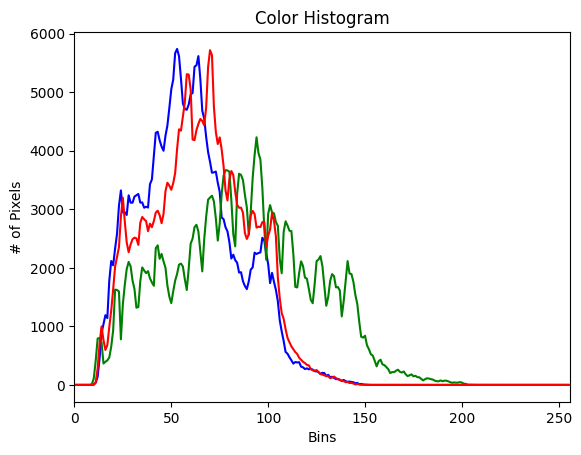

In [11]:
plot_histogram(img, 'Color Histogram')

In [12]:
img_gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

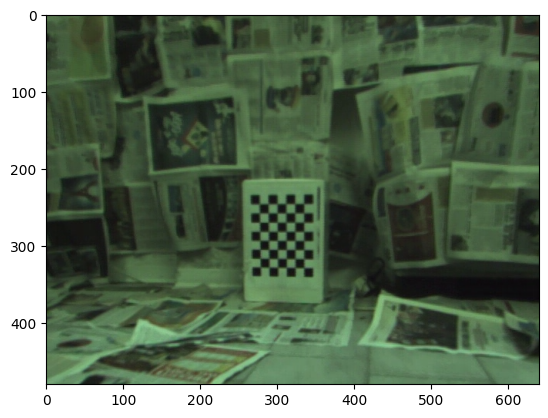

In [13]:
img_x = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img_x)
plt.show()

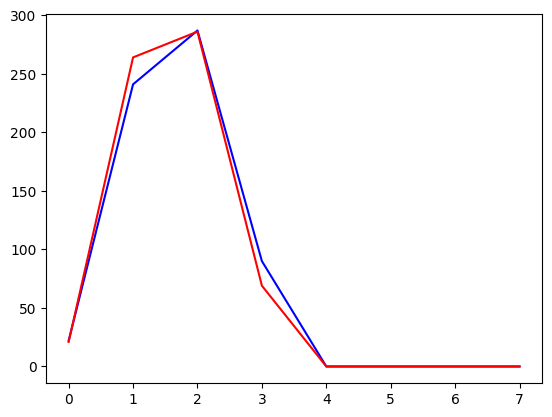

In [14]:
hist1 = cv2.calcHist(img_gray1, [0], None, [8], [0, 256])
hist2 = cv2.calcHist(img_gray2, [0], None, [8], [0, 256])
plt.plot(hist1, 'b')
plt.plot(hist2, 'r')
plt.show()

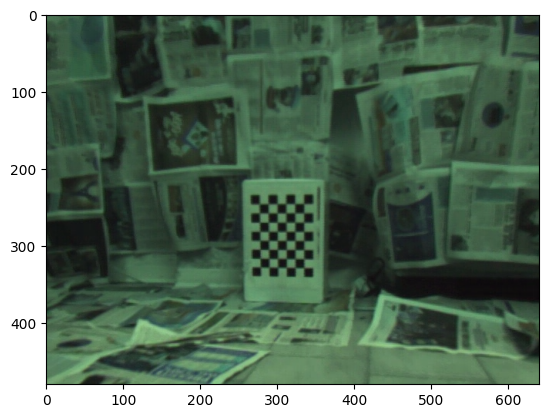

In [15]:
plt.imshow(img)
plt.show()

<h3> Detecting Chessboard Pattern (Single Image)</h3>

In [16]:
pattern_size = (6, 8) # number of inner corner, (columns, rows) for OpenCV

In [17]:
found, corners = cv2.findChessboardCorners(img_gray1, pattern_size)
print("Found: " , found)
print("2D image coordinate of corners: ", corners)

Found:  True
2D image coordinate of corners:  [[[276.77643 247.1833 ]]

 [[288.34442 246.24152]]

 [[300.23627 246.1392 ]]

 [[311.06436 245.73996]]

 [[322.5864  246.46198]]

 [[334.53333 246.01067]]

 [[277.4241  258.45352]]

 [[288.36777 258.61804]]

 [[300.2728  258.44012]]

 [[311.5822  257.81454]]

 [[322.94647 258.50693]]

 [[334.7256  258.35684]]

 [[277.58463 270.1731 ]]

 [[288.76236 270.2757 ]]

 [[300.45737 270.48715]]

 [[311.70044 270.52765]]

 [[322.75998 270.51468]]

 [[334.67145 270.61746]]

 [[277.97617 282.36536]]

 [[288.80505 282.58575]]

 [[300.47955 281.97552]]

 [[311.71667 282.5574 ]]

 [[322.92142 282.3305 ]]

 [[334.5188  282.42157]]

 [[278.094   293.49518]]

 [[289.37146 293.67734]]

 [[300.1503  293.78873]]

 [[311.84204 293.9367 ]]

 [[323.49518 294.0064 ]]

 [[334.5832  294.02924]]

 [[278.02307 305.50446]]

 [[289.44888 305.51715]]

 [[300.4255  305.6942 ]]

 [[312.06424 305.9823 ]]

 [[323.64902 306.12842]]

 [[334.71533 306.0364 ]]

 [[277.6871  317.4

In [18]:
# Do cornerSubPix only if chessboard found is True
if found:
    #Refining corner position to subpixel iteratively until criteria max_count=30 or criteria_eps_error=1 is sutisfied
    term = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_COUNT, 30, 1)
    #Image Corners 
    cv2.cornerSubPix(img_gray1, corners, (5, 5), (-1, -1), term)

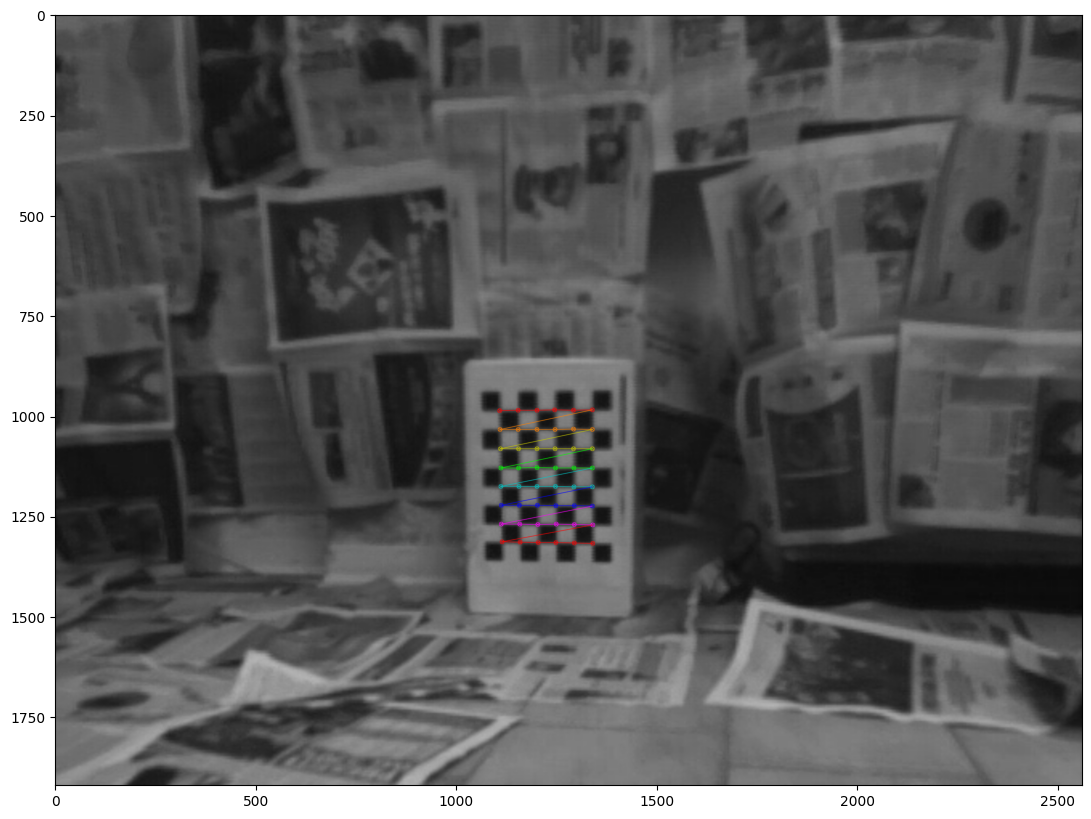

In [19]:
vis = cv2.cvtColor(img_gray1, cv2.COLOR_GRAY2BGR)
vis = cv2.resize(vis,None,fx=4, fy=4)
cv2.drawChessboardCorners(vis, pattern_size, corners*4, found)
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.show()

<h3> Converting to NumPy Array </h3>

In [20]:
np_L = np.array(roboL_frames)
np_R = np.array(roboR_frames)

In [21]:
np_L.shape

(389, 480, 640, 3)